
##**Credit Risk Analysis**

### **Importing the Data:**

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("CreditDataset.xlsx")

## **Pre-processing:**

In [3]:
df.shape

(3000, 30)

In [4]:
df.head()

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1,582,3,3,0,4,0.0,5,117,27,...,3.0,0.9179,0.2083,2,3,7,0.2083,4,4,0.0000
1,1,662,15,9,0,3,1.0,3,14,14,...,1.0,0.8000,0.0000,0,0,0,1.0000,12,0,1.0000
2,1,805,0,0,0,1,5.0,1,354,7,...,5.0,0.3552,0.6538,0,1,1,0.7308,1,1,0.5263
3,1,1175,8,5,0,6,1.0,10,16,4,...,3.0,0.9127,0.2500,1,1,1,0.7500,7,1,1.3333
4,1,1373,3,1,0,9,0.0,8,130,52,...,1.0,1.2511,0.0000,0,1,4,0.1429,3,1,0.0000


In [5]:
#dropping customer ID column
df = df.drop('ID', axis = 1)
df.shape

(3000, 29)

**Data Imputations:**

In [6]:
#Finding the missing values:
df.isna().sum()

,0
TARGET,0
DerogCnt,0
CollectCnt,0
BanruptcyInd,0
InqCnt06,0
InqTimeLast,188
InqFinanceCnt24,0
TLTimeFirst,0
TLTimeLast,0
TLCnt03,0


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

<Axes: xlabel='TLOpen24Pct', ylabel='Density'>

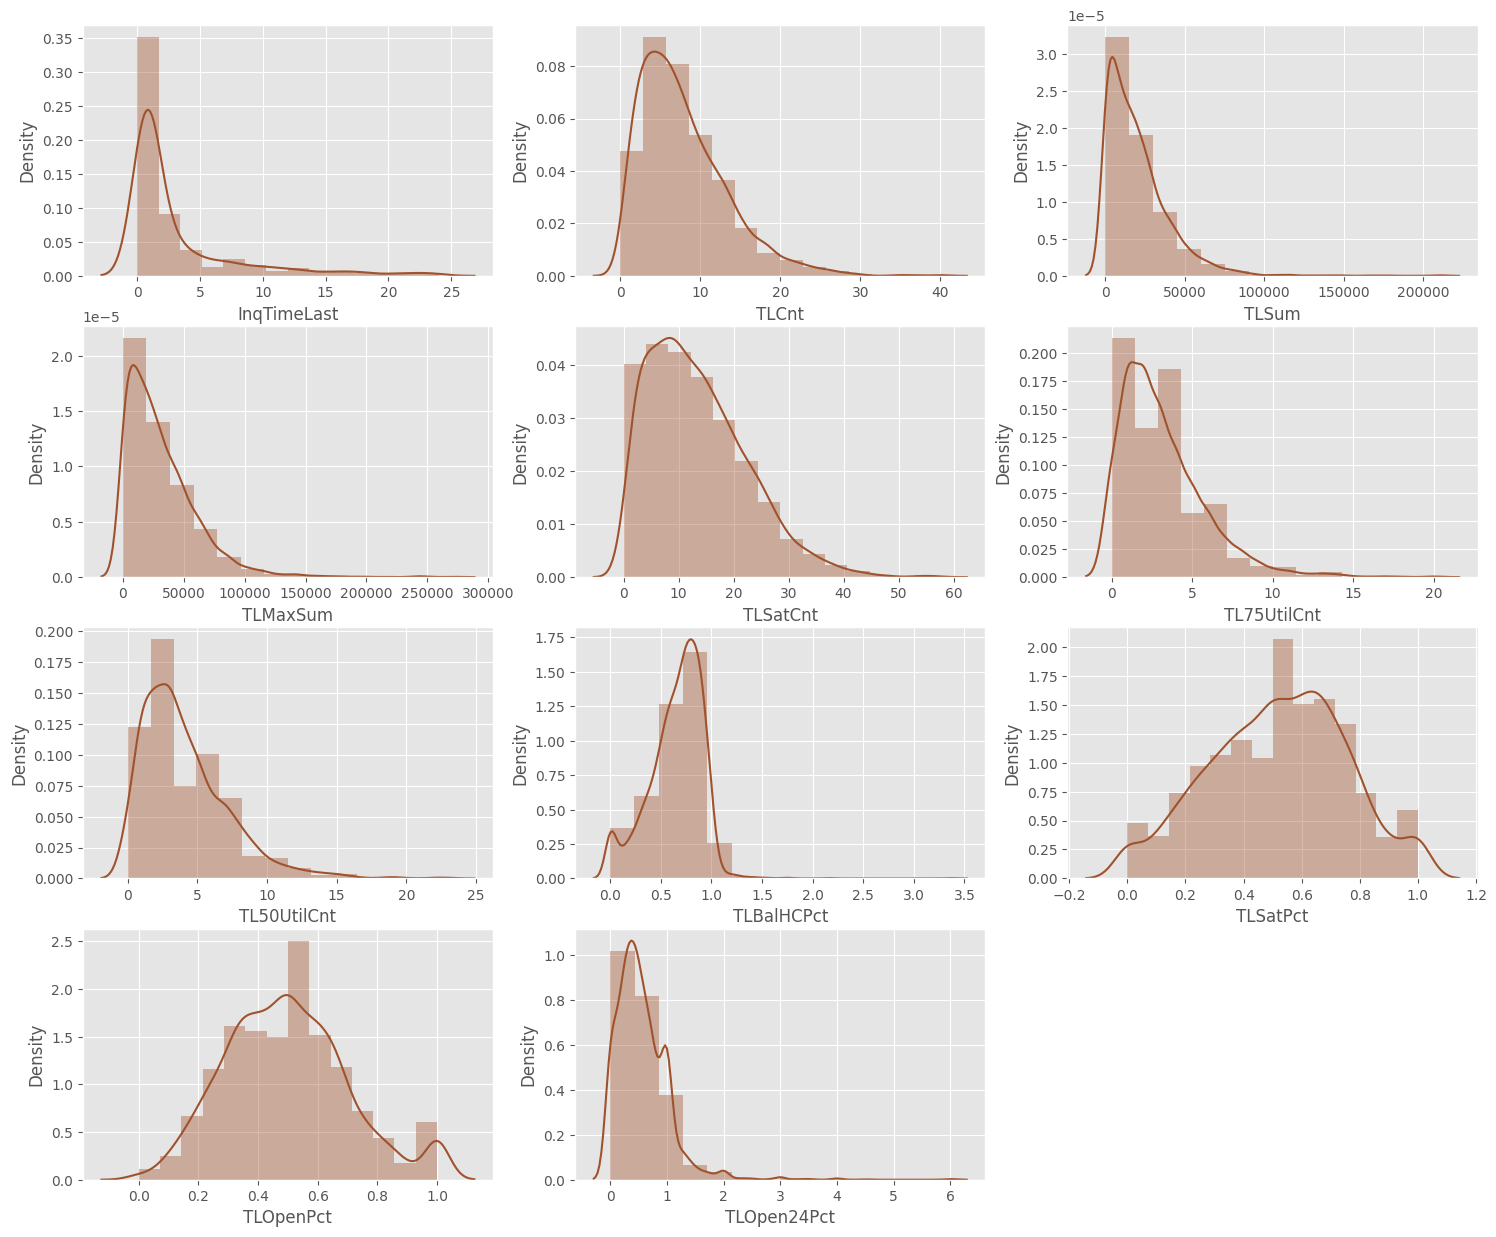

In [8]:
plt.figure(figsize = (18,15))
plt.style.use('ggplot')
plt.subplot(4, 3, 1)
sns.distplot(df.InqTimeLast,bins=14,color='sienna')
plt.subplot(4, 3, 2)
sns.distplot(df.TLCnt,bins=14,color='sienna')
plt.subplot(4, 3, 3)
sns.distplot(df.TLSum,bins=14,color='sienna')
plt.subplot(4, 3, 4)
sns.distplot(df.TLMaxSum,bins=14,color='sienna')
plt.subplot(4, 3, 5)
sns.distplot(df.TLSatCnt,bins=14,color='sienna')
plt.subplot(4, 3, 6)
sns.distplot(df.TL75UtilCnt,bins=14,color='sienna')
plt.subplot(4, 3, 7)
sns.distplot(df.TL50UtilCnt,bins=14,color='sienna')
plt.subplot(4, 3, 8)
sns.distplot(df.TLBalHCPct,bins=14,color='sienna')
plt.subplot(4, 3, 9)
sns.distplot(df.TLSatPct,bins=14,color='sienna')
plt.subplot(4, 3, 10)
sns.distplot(df.TLOpenPct,bins=14,color='sienna')
plt.subplot(4, 3, 11)
sns.distplot(df.TLOpen24Pct,bins=14,color='sienna')

In [9]:
# MEDIAN Values:
print('InqTimeLast(med): ',df['InqTimeLast'].median())
print('TLSum(med): ',df['TLSum'].median())
print('TLMaxSum(med): ',df['TLMaxSum'].median())
print('TLCnt(med): ',df['TLCnt'].median())
print('TLSatCnt(med): ',df['TLSatCnt'].median())
print('TL75UtilCnt(med): ',df['TL75UtilCnt'].median())
print('TL50UtilCnt(med): ',df['TL50UtilCnt'].median())
print('TLBalHCPct(med): ',df['TLBalHCPct'].median())
print('TLSatPct(med): ',df['TLSatPct'].median())
print('TLOpenPct(med): ',df['TLOpenPct'].median())
print('TLOpen24Pct(med): ',df['TLOpen24Pct'].median())

InqTimeLast(med):  1.0
TLSum(med):  15546.5
TLMaxSum(med):  24188.5
TLCnt(med):  7.0
TLSatCnt(med):  12.0
TL75UtilCnt(med):  3.0
TL50UtilCnt(med):  3.0
TLBalHCPct(med):  0.6954999999999999
TLSatPct(med):  0.52705
TLOpenPct(med):  0.5
TLOpen24Pct(med):  0.5


In [10]:
# MEAN Values:
print('InqTimeLast(mean): ',df['InqTimeLast'].mean())
print('TLSum(mean): ',df['TLSum'].mean())
print('TLMaxSum(mean): ',df['TLMaxSum'].mean())
print('TLCnt(mean): ',df['TLCnt'].mean())
print('TLSatCnt(mean): ',df['TLSatCnt'].mean())
print('TL75UtilCnt(mean): ',df['TL75UtilCnt'].mean())
print('TL50UtilCnt(mean): ',df['TL50UtilCnt'].mean())
print('TLBalHCPct(mean): ',df['TLBalHCPct'].mean())
print('TLSatPct(mean): ',df['TLSatPct'].mean())
print('TLOpenPct(mean): ',df['TLOpenPct'].mean())
print('TLOpen24Pct(mean): ',df['TLOpen24Pct'].mean())

InqTimeLast(mean):  3.108108108108108
TLSum(mean):  20151.09560810811
TLMaxSum(mean):  31205.900675675675
TLCnt(mean):  7.879546212879546
TLSatCnt(mean):  13.511682242990654
TL75UtilCnt(mean):  3.1216821785591176
TL50UtilCnt(mean):  4.0779041709755255
TLBalHCPct(mean):  0.6481782696857046
TLSatPct(mean):  0.5183314419225633
TLOpenPct(mean):  0.4961683016349683
TLOpen24Pct(mean):  0.5642190523857191


In [11]:
# MODE Values:
print('InqTimeLast(mode): ',df['InqTimeLast'].mode())
print('TLSum(mode): ',df['TLSum'].mode())
print('TLMaxSum(mode): ',df['TLMaxSum'].mode())
print('TLCnt(mode): ',df['TLCnt'].mode())
print('TLSatCnt(mode): ',df['TLSatCnt'].mode())
print('TL75UtilCnt(mode): ',df['TL75UtilCnt'].mode())
print('TL50UtilCnt(mode): ',df['TL50UtilCnt'].mode())
print('TLBalHCPct(mode): ',df['TLBalHCPct'].mode())
print('TLSatPct(mode): ',df['TLSatPct'].mode())
print('TLOpenPct(mode): ',df['TLOpenPct'].mode())
print('TLOpen24Pct(mode): ',df['TLOpen24Pct'].mode())

InqTimeLast(mode):  0    1.0
Name: InqTimeLast, dtype: float64
TLSum(mode):  0    0.0
Name: TLSum, dtype: float64
TLMaxSum(mode):  0    0.0
Name: TLMaxSum, dtype: float64
TLCnt(mode):  0    3.0
Name: TLCnt, dtype: float64
TLSatCnt(mode):  0    10.0
Name: TLSatCnt, dtype: float64
TL75UtilCnt(mode):  0    1.0
Name: TL75UtilCnt, dtype: float64
TL50UtilCnt(mode):  0    3.0
Name: TL50UtilCnt, dtype: float64
TLBalHCPct(mode):  0    0.0
Name: TLBalHCPct, dtype: float64
TLSatPct(mode):  0    0.5
Name: TLSatPct, dtype: float64
TLOpenPct(mode):  0    0.5
Name: TLOpenPct, dtype: float64
TLOpen24Pct(mode):  0    1.0
Name: TLOpen24Pct, dtype: float64


In [12]:
df1 = df

In [13]:
# Replacing missing values with median
df1['InqTimeLast'] = df1['InqTimeLast'].fillna(df1['InqTimeLast'].median())
df1['TLSum'] = df1['TLSum'].fillna(df1['TLSum'].median())
df1['TLMaxSum'] = df1['TLMaxSum'].fillna(df1['TLMaxSum'].median())
df1['TLCnt'] = df1['TLCnt'].fillna(df1['TLCnt'].median())
df1['TLSatCnt'] = df1['TLSatCnt'].fillna(df1['TLSatCnt'].median())
df1['TL75UtilCnt'] = df1['TL75UtilCnt'].fillna(df1['TL75UtilCnt'].median())
df1['TL50UtilCnt'] = df1['TL50UtilCnt'].fillna(df1['TL50UtilCnt'].median())
df1['TLBalHCPct'] = df1['TLBalHCPct'].fillna(df1['TLBalHCPct'].median())
df1['TLSatPct'] = df1['TLSatPct'].fillna(df1['TLSatPct'].median())
df1['TLOpenPct'] = df1['TLOpenPct'].fillna(df1['TLOpenPct'].median())
df1['TLOpen24Pct'] = df1['TLOpen24Pct'].fillna(df1['TLOpen24Pct'].median())

In [14]:
# Replacing missing values with mean
# df1['InqTimeLast'] = df1['InqTimeLast'].fillna(df1['InqTimeLast'].mean())
# df1['TLSum'] = df1['TLSum'].fillna(df1['TLSum'].mean())
# df1['TLMaxSum'] = df1['TLMaxSum'].fillna(df1['TLMaxSum'].mean())
# df1['TLCnt'] = df1['TLCnt'].fillna(df1['TLCnt'].mean())
# df1['TLSatCnt'] = df1['TLSatCnt'].fillna(df1['TLSatCnt'].mean())
# df1['TL75UtilCnt'] = df1['TL75UtilCnt'].fillna(df1['TL75UtilCnt'].mean())
# df1['TL50UtilCnt'] = df1['TL50UtilCnt'].fillna(df1['TL50UtilCnt'].mean())
# df1['TLBalHCPct'] = df1['TLBalHCPct'].fillna(df1['TLBalHCPct'].mean())
# df1['TLSatPct'] = df1['TLSatPct'].fillna(df1['TLSatPct'].mean())
# df1['TLOpenPct'] = df1['TLOpenPct'].fillna(df1['TLOpenPct'].mean())
# df1['TLOpen24Pct'] = df1['TLOpen24Pct'].fillna(df1['TLOpen24Pct'].mean())

In [15]:
df1.isna().sum()

,0
TARGET,0
DerogCnt,0
CollectCnt,0
BanruptcyInd,0
InqCnt06,0
InqTimeLast,0
InqFinanceCnt24,0
TLTimeFirst,0
TLTimeLast,0
TLCnt03,0


## Increasing Dataset size:

In [16]:
pip install ctgan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 61.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
  

In [17]:
from ctgan import CTGAN

In [18]:
df1.columns

Index(['TARGET', 'DerogCnt', 'CollectCnt', 'BanruptcyInd', 'InqCnt06',
       'InqTimeLast', 'InqFinanceCnt24', 'TLTimeFirst', 'TLTimeLast',
       'TLCnt03', 'TLCnt12', 'TLCnt24', 'TLCnt', 'TLSum', 'TLMaxSum',
       'TLSatCnt', 'TLDel60Cnt', 'TLBadCnt24', 'TL75UtilCnt', 'TL50UtilCnt',
       'TLBalHCPct', 'TLSatPct', 'TLDel3060Cnt24', 'TLDel90Cnt24',
       'TLDel60CntAll', 'TLOpenPct', 'TLBadDerogCnt', 'TLDel60Cnt24',
       'TLOpen24Pct'],
      dtype='object')

In [19]:
discrete_columns = list(df1.columns)

In [20]:
df2 = df1

In [21]:
ctgan = CTGAN(epochs=10)
ctgan.fit(df2, discrete_columns)

In [22]:
syndf = ctgan.sample(30000)

In [23]:
syndf

,TARGET,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,TLCnt03,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,0,23,0,1,3,2.0,5,130,9,2,...,3.0,0.5149,0.5385,0,0,2,0.5714,0,0,0.8000
1,0,0,0,0,3,1.0,17,175,5,1,...,8.0,0.6911,0.0000,2,0,1,0.4000,14,12,1.0000
2,0,2,1,0,0,14.0,21,409,2,0,...,5.0,0.5529,0.2500,3,0,4,0.3333,0,1,0.0714
3,0,5,1,1,1,1.0,2,196,8,0,...,5.0,0.5672,0.6000,0,0,0,0.4444,0,14,0.5000
4,0,0,8,1,0,0.0,0,396,2,0,...,1.0,0.9566,0.7241,0,0,15,0.4483,1,0,1.6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,0,0,0,1,0.0,2,319,4,1,...,3.0,0.4559,0.1250,0,7,10,0.5152,10,0,0.8667
29996,0,0,0,0,2,0.0,1,304,2,0,...,2.0,0.8792,0.1905,2,0,0,0.5517,2,0,0.8462
29997,1,0,0,0,0,1.0,33,265,10,0,...,7.0,0.5226,0.3077,1,0,1,0.1600,0,0,0.1429
29998,0,0,0,0,2,20.0,1,52,3,3,...,1.0,0.3011,0.7273,2,0,11,0.0909,47,7,0.0000


## **Balancing Dataset:**

In [24]:
syndf['TARGET'].value_counts()

,count
TARGET,
0,23980
1,6020


<Axes: xlabel='TARGET', ylabel='count'>

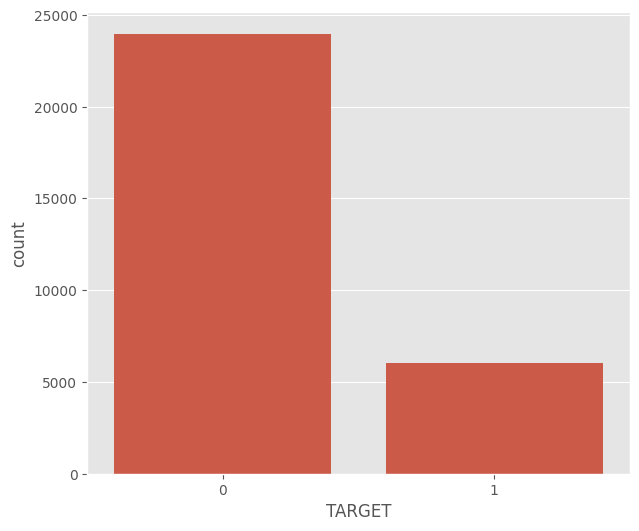

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,6))
sns.countplot(x='TARGET', data = syndf)

### **Data Augmentation:**

#### SMOTE:

Test-Train Split:

In [26]:
# X1 = df1.drop(['TARGET'], axis = 1)
# Y1 = df1['TARGET']

In [27]:
#y1 = df1.iloc[:, 0].values
#x1 = df1.iloc[:, 1:29].values

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0,stratify=y)
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [28]:
# from sklearn.model_selection import train_test_split
# X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.25, random_state = 5)

In [29]:
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state=42)
# X1_train, Y1_train = sm.fit_resample(X1_train, Y1_train)

In [30]:
# X1_train.shape

In [31]:
# X_Full = np.hstack((X1_train,Y1_train.values.reshape(-1,1)))
# sdf1 = pd.DataFrame(X_Full,columns=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,'TARGET'])
# plt.figure(figsize=(7,6))
# sns.countplot('TARGET', data = sdf1)

#### Bootstrap Method:

In [32]:
# resample uses "bootstrapping" method to regenrate samples by randomly selecting data for each class
from sklearn.utils import resample
df_0 = syndf[syndf['TARGET'] == 0]
df_1 = syndf[syndf['TARGET'] == 1]
df_1.shape

(6020, 29)

In [33]:
# Apply Resample
df_1_upsample = resample(df_1, n_samples = 23864, replace = True, random_state = 123)
df_1_upsample.shape

(23864, 29)

In [34]:
d = df_1_upsample.drop_duplicates()
d.shape

(5905, 29)

In [35]:
syndf2 = pd.concat([df_0, df_1_upsample])
syndf2['TARGET'].value_counts()

,count
TARGET,
0,23980
1,23864


<Axes: xlabel='TARGET', ylabel='count'>

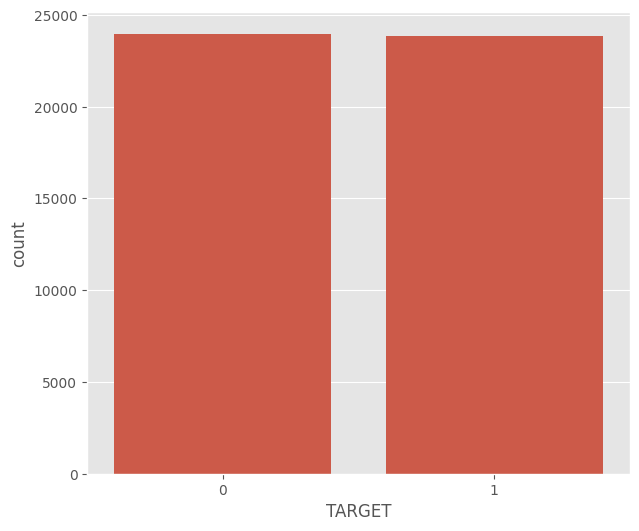

In [36]:
plt.figure(figsize=(7,6))
sns.countplot(x='TARGET', data = syndf2)

##### Test-Train Split:

In [37]:
X1 = syndf2.drop(['TARGET'], axis = 1)
Y1 = syndf2['TARGET']
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.25, random_state = 5)

## **Feature Selection:**

**Using Information Gain:**

In [38]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X1_train, Y1_train)

In [39]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X1_train.columns
mutual_info.sort_values(ascending=False)

,0
TLSum,0.072136
TLMaxSum,0.070924
TLBalHCPct,0.055228
TLSatPct,0.008050
TLTimeFirst,0.007682
TLOpenPct,0.007596
BanruptcyInd,0.006041
TL75UtilCnt,0.003370
InqCnt06,0.001800
TLDel60Cnt,0.001574


<Axes: >

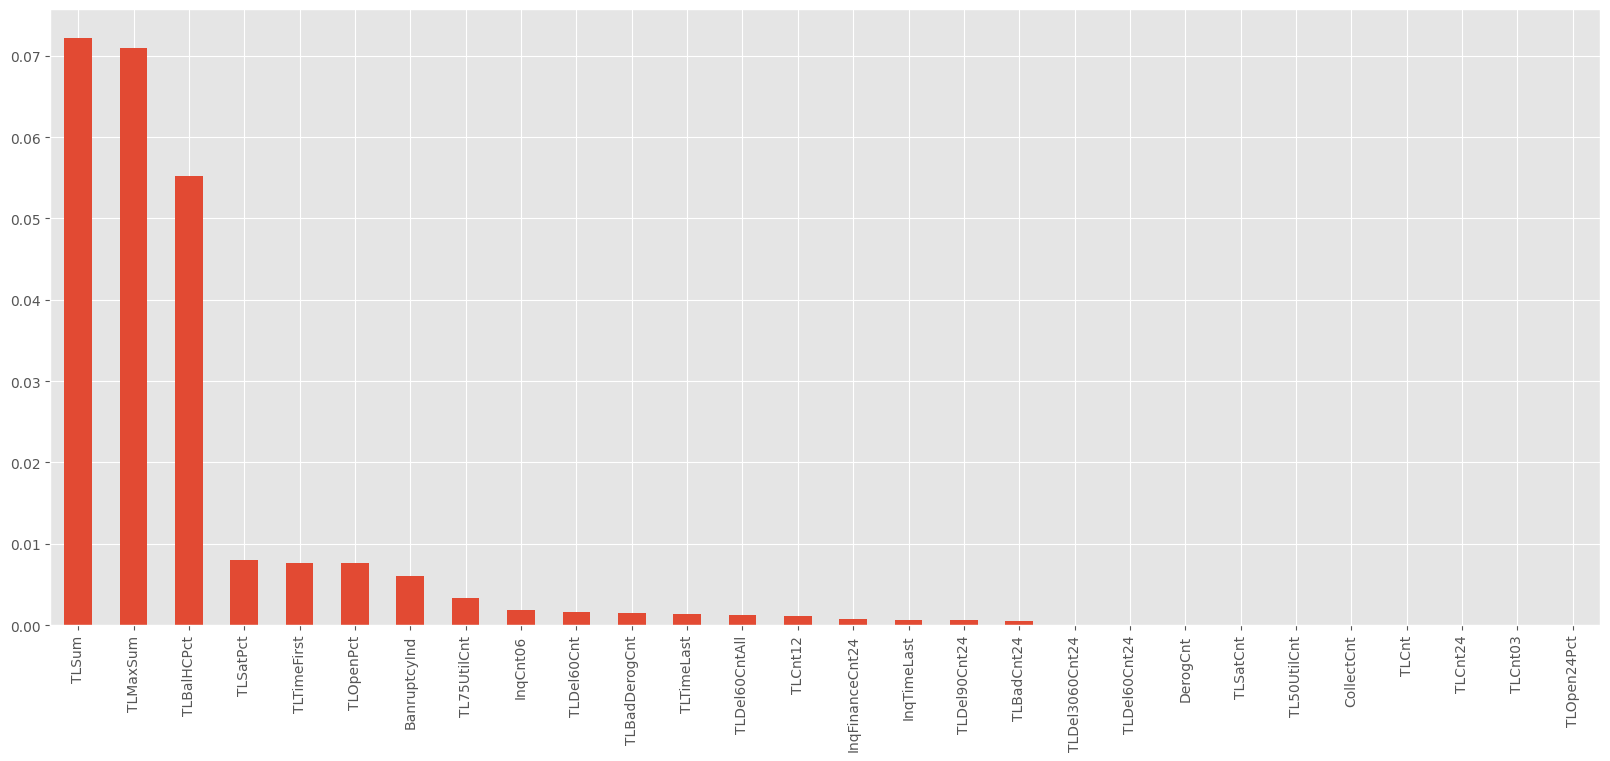

In [40]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

Choosing the top 10 features based on information gain:

In [41]:
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k=10)
sel_five_cols.fit(X1_train, Y1_train)
top = X1_train.columns[sel_five_cols.get_support()]
top

Index(['DerogCnt', 'BanruptcyInd', 'TLTimeFirst', 'TLSum', 'TLMaxSum',
       'TLBalHCPct', 'TLSatPct', 'TLOpenPct', 'TLDel60Cnt24', 'TLOpen24Pct'],
      dtype='object')

In [42]:
X1_train = X1_train[top]
X1_test = X1_test[top]

In [43]:
X1_train

,DerogCnt,BanruptcyInd,TLTimeFirst,TLSum,TLMaxSum,TLBalHCPct,TLSatPct,TLOpenPct,TLDel60Cnt24,TLOpen24Pct
20067,13,0,339,3950.0,128509.0,0.8680,0.4286,0.5588,1,0.3333
2211,0,0,125,185.0,21792.0,0.4302,0.5556,0.3279,0,0.3077
12363,0,0,144,17059.0,42478.0,0.6272,0.5294,0.3235,3,0.6667
25128,0,0,68,43606.0,8526.0,0.5682,0.3333,0.4375,1,0.3333
5148,0,0,382,22717.0,31930.0,0.5653,0.3750,1.0000,0,0.0000
...,...,...,...,...,...,...,...,...,...,...
6929,0,0,240,14971.0,14312.0,0.5799,0.4828,0.6818,13,0.4348
15920,0,0,78,42067.0,869.0,0.8577,0.2500,0.3793,0,0.4167
25586,0,0,80,11987.0,9512.0,0.5095,0.2500,0.5349,0,0.9000
23311,0,1,44,69.0,76322.0,1.0381,0.4348,0.3571,1,0.0556


**Using Pearson Correlation:**

<Axes: >

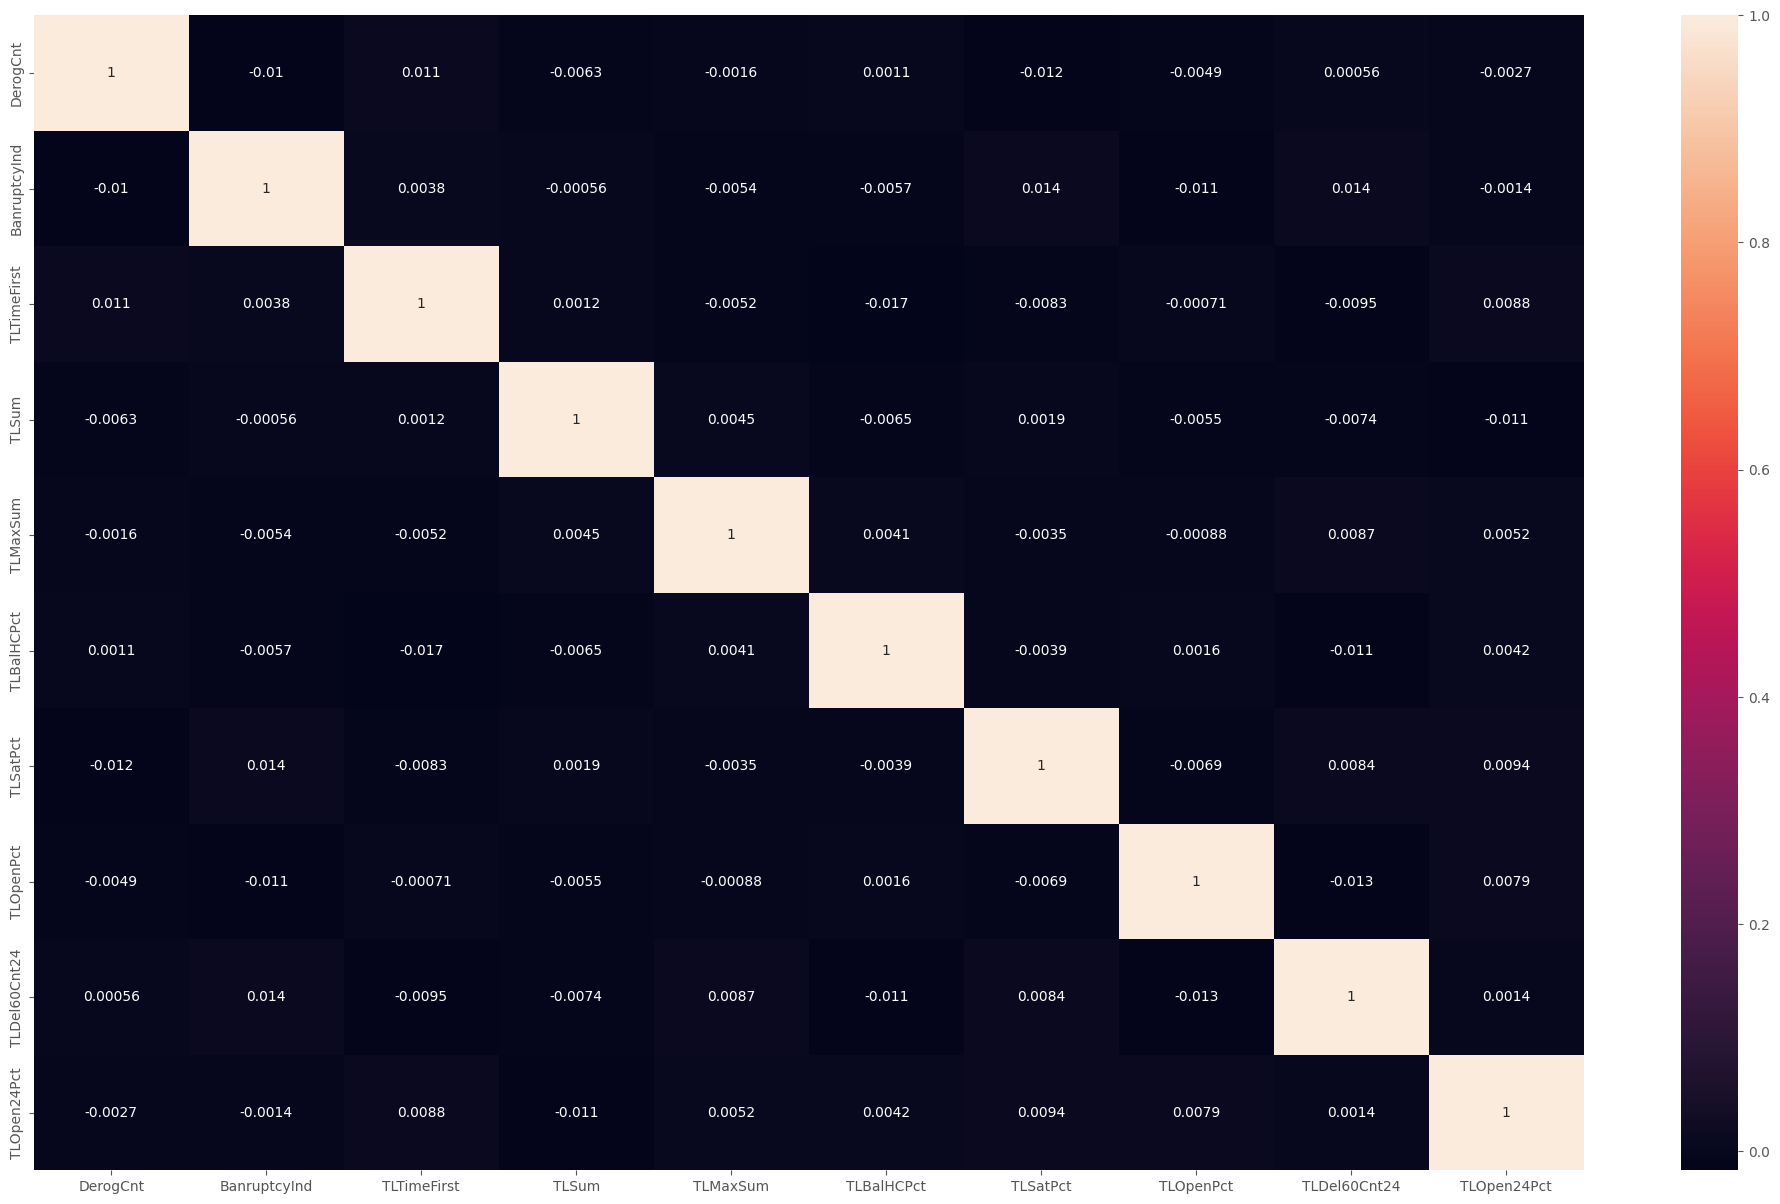

In [44]:
plt.figure(figsize=(25,15))
sns.heatmap(X1_train.corr('pearson'), annot = True)

In [45]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [46]:
corr_features = correlation(X1_train, 0.9)
len(set(corr_features))

0

In [47]:
corr_features

set()

In [48]:
# corr_features2 = ['TLDel60Cnt','TLDel90Cnt24']

Dropping highly Correlated features:

In [49]:
# X1_train = X1_train.drop(corr_features,axis=1)
# X1_test = X1_test.drop(corr_features,axis=1)

Saving the Preprocessed Datasets:

In [50]:
X1_train.to_csv("X1_train.csv", index=False)
Y1_train.to_csv("Y1_train.csv", index=False)
X1_test.to_csv("X1_test.csv", index=False)
Y1_test.to_csv("Y1_test.csv", index=False)